     ┌───┐┌──────────┐
q_0: ┤ X ├┤0         ├
     └───┘│  Unitary │
q_1: ─────┤1         ├
          └──────────┘
c: 2/═════════════════
                      


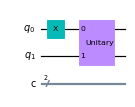

In [1]:
from qiskit import QuantumCircuit
from qiskit.extensions import UnitaryGate
import numpy as np

matrix1 = [[1, 0, 0, 0],
          [0, 1, 0, 0],
          [0, 0, 0, 1],
          [0, 0, 1, 0]]
gatecx = UnitaryGate(matrix1)
matrix2 = [[0,1],
          [1,0]]
gatex = UnitaryGate(matrix2)
matrix3 = [[1/np.sqrt(2),1/np.sqrt(2)],
           [1/np.sqrt(2),-1/np.sqrt(2)]]
gateh = UnitaryGate(matrix3)

circuit = QuantumCircuit(2,2)
circuit.x(0)
circuit.append(gatecx,[0,1])
print(circuit)
circuit.draw('mpl',scale=0.6)

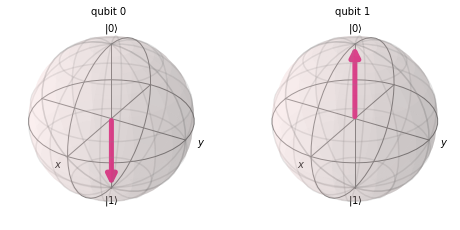

In [7]:
from qiskit import Aer
from qiskit.visualization import plot_bloch_multivector

simu = Aer.get_backend('statevector_simulator')
vector=simu.run(circuit).result().get_statevector()
# print(vector)
plot_bloch_multivector(vector)

In [6]:
circuit.measure(range(2),range(2))
from qiskit import Aer
simulator = Aer.get_backend('qasm_simulator')
job = simulator.run(circuit, shots=10)
result = job.result()
counts = result.get_counts()
print(counts)

{'11': 10}


In [2]:
from qiskit.circuit.library import CXGate
matrixcx = CXGate().to_matrix()
print(matrixcx)

[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]
